## Problem: Bit Coin Analysis 
                
### About the data-set:
            
  A very extensive data set is provided showing the bitcoin price analysis from the 2/17/2010 to 1/31/2018 collected everyday.
  The given data set contains huge number of variables. It contains aspects like : Market price,USD value of bitcoin        supply,block   size transactions etc.
 ### Problem satement:
  The aim of this analysis is to visualize the given data and predict the pattern of the market price of bitcoin on different     factors and also predict the future of this dataset.
  ### Procedure followed:
  Fisrt we read the given data set in csv_path variable and store it in a data frame df using read_csv function of pandas library.
  Next we clean the data by changing all infinite values to NAN values using replace function and then remove all the NAN values from the given data set using dropna function.
  We then create new columns called month and year in which we extract the month and year from the date column and store it in the respective columns, this was done by splitting the date with respect to "/" as the format of date was mm/dd/yyyy.
  Grouping of data with respect to month and year was done with the help of groupby function and the mean of the data variables was calculated, this reduced the data for better evaluation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path="https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv "
df=pd.read_csv(csv_path,error_bad_lines=False)
df.head(5)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


Hint: Use groupby() function 

In [6]:
#answer, write code which is a solution for above question.
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
for i in range(len(df)):
    df.loc[i,'month']=int(df.loc[i,'Date'].split('/')[0])
    df.loc[i,'year']=int(df.loc[i,'Date'].split('/')[2])
df.groupby(['year','month']).mean()

btc_market_price  btc_total_bitcoins  btc_market_cap  \
year   month                                                         
2010.0 2.0            0.000000        2.100992e+06    0.000000e+00   
       3.0            0.000000        2.282116e+06    0.000000e+00   
       4.0            0.000000        2.557882e+06    0.000000e+00   
       5.0            0.000000        2.811679e+06    0.000000e+00   
       6.0            0.000000        3.058158e+06    0.000000e+00   
       7.0            0.000000        3.384223e+06    0.000000e+00   
       8.0            0.032721        3.730840e+06    1.245110e+05   
       9.0            0.066370        4.007312e+06    2.659042e+05   
       10.0           0.117821        4.286889e+06    5.086297e+05   
       11.0           0.284760        4.599968e+06    1.310241e+06   
       12.0           0.251689        4.891006e+06    1.232299e+06   
2011.0 1.0            0.381412        5.151071e+06    1.968856e+06   
       2.0            0.968261        5.382534e+06    5.243620e+06   
       3.0            0.880233        5.707327e+06    5.003307e+06   
       4.0            1.304114        5.930068e+06    7.776982e+06   
       5.0            6.611851        6.226032e+06    4.134524e+07   
       6.0           19.645180        6.555663e+06    1.286981e+08   
       7.0           14.759363        6.830269e+06    1.007601e+08   
       8.0           10.987897        7.075393e+06    7.756873e+07   
       9.0            6.440761        7.277522e+06    4.680752e+07   
       10.0           3.899055        7.476115e+06    2.911226e+07   
       11.0           2.826189        7.673178e+06    2.166983e+07   
       12.0           3.600648        7.889682e+06    2.844061e+07   
2012.0 1.0            6.427743        8.123442e+06    5.220945e+07   
       2.0            5.313641        8.348169e+06    4.433188e+07   
       3.0            5.012995        8.573273e+06    4.297363e+07   
       4.0            5.052888        8.793917e+06    4.443974e+07   
       5.0            5.121601        9.017529e+06    4.618565e+07   
       6.0            6.099766        9.238085e+06    5.638357e+07   
       7.0            8.109984        9.468571e+06    7.685611e+07   
...                        ...                 ...             ...   
2015.0 8.0          252.816129        1.450404e+07    3.666164e+09   
       9.0          233.819000        1.461784e+07    3.417928e+09   
       10.0         265.384516        1.472993e+07    3.909854e+09   
       11.0         349.386000        1.484527e+07    5.186344e+09   
       12.0         422.022258        1.496753e+07    6.317406e+09   
2016.0 1.0          410.954194        1.509007e+07    6.200581e+09   
       2.0          402.526552        1.521231e+07    6.124100e+09   
       3.0          415.502258        1.532323e+07    6.366825e+09   
       4.0          434.075333        1.543725e+07    6.698092e+09   
       5.0          460.761290        1.555180e+07    7.166094e+09   
       6.0          640.389954        1.566401e+07    1.006520e+10   
       7.0          661.036602        1.576084e+07    1.043479e+10   
       8.0          579.744405        1.581894e+07    9.201481e+09   
       9.0          607.146550        1.587584e+07    9.661413e+09   
       10.0         642.163788        1.593296e+07    1.026940e+10   
       11.0         724.360973        1.598942e+07    1.160023e+10   
       12.0         822.463950        1.604708e+07    1.322795e+10   
2017.0 1.0          909.749630        1.610701e+07    1.468449e+10   
       2.0         1063.003844        1.616441e+07    1.720776e+10   
       3.0         1129.199654        1.621978e+07    1.828479e+10   
       4.0         1221.494591        1.627660e+07    2.019389e+10   
       5.0         1881.412023        1.633431e+07    3.073639e+10   
       6.0         2621.314840        1.639379e+07    4.297287e+10   
       7.0         2516.765687        1.645180e+07    4.140680e+10   
       8.0         3889.

In [7]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
                

        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

The answer did not pass the test.


## Calculating the Regression line for the given data set 
We find the mean sqaured error and coefficient of determination(r^2) using  mean_squared_error and r2_score functions.Plotting of the graph is done using jointplot method part of the seaborn library. The graph plotted below is a scatter plot with the regression line.The more steep the regression line, the more accurate is the prediction.Plot the graphs for different combinations and check for the best line. This is analysed by checking the coefficient of determination, if the value is nearer or equal to 1 then the regression line obtained is very accurate.    

MSE: 2308.18955301
R^2: 0.999565400273


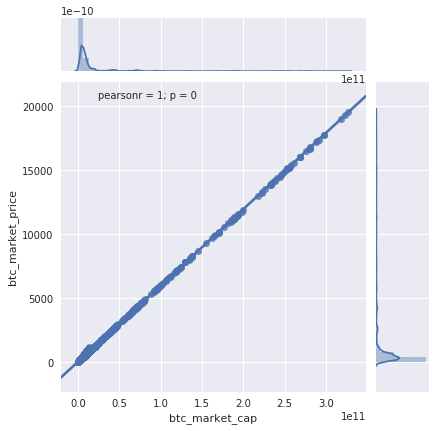

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
g=sns.jointplot("btc_market_cap" , "btc_market_price",data=df,kind='reg')
lm=LinearRegression()
x=df[['btc_market_cap']]
y=df[['btc_market_price']]
lm.fit(x,y)
y_hat=lm.predict(x)


hint:use man_squared_error funtion to calculate mse and r2_score function for coefficient of determination

In [15]:
print("MSE:",mean_squared_error(df[['btc_market_price']].values,y_hat))
r2=(r2_score(y,y_hat))
print("R^2:",r2)
print("Estimated intercept of line is(c)=",lm.intercept_)
print("Estimated coefficent of the line(m) is=",lm.coef_)
print("The line is y=m*x+c ")

Estimated intercept of line is(c)= [ 37.92774573]
Estimated coefficent of the line(m) is= [[  5.95957143e-08]]
The line is y=m*x+c 


In [ ]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
                

        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

## Prediction of future values and the accuracy of the prediction
We have calculated the intercept and coefficent of the said linear line.
It is in the form:
Y=m*X + C
We have to read the test set values and follow a similar cleaning method .
During the training set we obtained the values of m and c, we have to substitue the values in the above equation .
We use the values of the particular variable in this case "btc_market_cap"  as x values and substitue it in the equation.We can store these values in a dataframe coloumn and calculate the market_price of the bitcoin.
We can use accuracy_score(y_true, y_pred) to calculate the accuracy of our prediction. 

In [ ]:
import datetime
csvr_path="https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv"
dfr=pd.read_csv(csvr_path,error_bad_lines=False)

Hint: Use accuracy_score(y_true, y_pred) to calculate the accuracy.

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.replace([np.inf, -np.inf], np.nan)
#follow the previous procedure for cleaning and complete the function.

x=dfr[['btc_market_cap']]
ynew=lm.predict(x)
print("MSE:",mean_squared_error(df[['btc_market_price']].values,y_hat))
r2=(r2_score(y,y_hat))
print("R^2:",r2)